# Selection Sort — Step‑by‑Step + Animation (Beginner Friendly)

Welcome! This notebook mirrors the style and flow of the other sorting notebooks, but teaches **Selection Sort**.
You will:
1. **See** what Selection Sort does (Quick Start animation).
2. **Understand** the idea with plain English & pseudocode.
3. **Trace** the algorithm step‑by‑step with **printouts**.
4. **Animate** it smoothly, with ready‑to‑run code.
5. Try small **practice** tweaks at the end.

# 🔴
## 0) Quick Start — Run these two cells to see Selection Sort in action
If you're in a hurry, **just run these two cells**. Then come back to learn *why* it works.

- The bars represent the list's values.
- Each frame shows the array after **a single write** (during the swap at the end of each pass).
- We silence the Matplotlib generator caching warning by setting `cache_frame_data=False`.

In [2]:
# Quick Start: imports
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

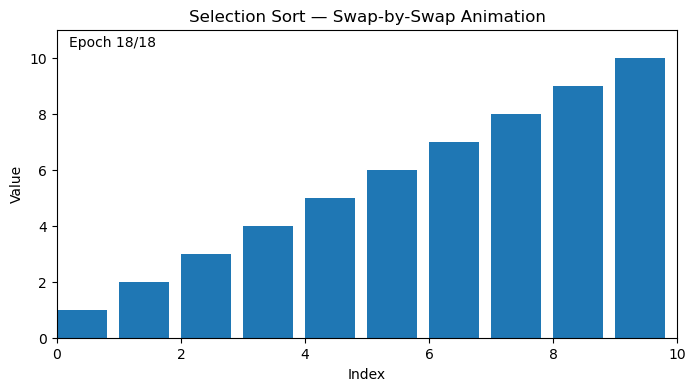

In [9]:
# Quick Start: animation-friendly Selection Sort (yields snapshots after each write)
def selection_sort_snapshots(array):
    yield array[:]
    n = len(array)
    for i in range(n - 1):
        # Find index of minimum element in A[i..n-1]
        min_idx = i
        for j in range(i + 1, n):
            if array[j] < array[min_idx]:
                min_idx = j
        # Swap into position i (write-by-write, to visualize each write separately)
        if min_idx != i:
            temp = array[i]
            array[i] = array[min_idx]   # write 1
            yield array[:]              # snapshot after write 1
            array[min_idx] = temp       # write 2
            yield array[:]              # snapshot after write 2
        else:
            # Even if no swap, yield at least once to show progress if desired.
            # Comment out the next line if you prefer frames only when array changes.
            yield array[:]

# Animate it (warning-free streaming)
N = 10
random.seed(2)
data = list(range(1, N + 1))
random.shuffle(data)

fig, ax = plt.subplots(figsize=(8, 4))
bars = ax.bar(range(len(data)), data, align='edge')
ax.set_xlim(0, len(data))
ax.set_ylim(0, max(data) * 1.1)
ax.set_title("Selection Sort — Swap-by-Swap Animation")
ax.set_xlabel("Index")
ax.set_ylabel("Value")

frames = list(selection_sort_snapshots(data[:]))
total_frames = len(frames)
frames_with_idx = [(i, f) for i, f in enumerate(frames, start=1)]
epoch_text = ax.text(0.02, 0.98, "", transform=ax.transAxes, ha="left", va="top")

def update(tup):
    i, frame = tup
    for rect, h in zip(bars, frame):
        rect.set_height(h)
    epoch_text.set_text(f"Epoch {i}/{total_frames}")
    return bars.patches + [epoch_text]

anim = FuncAnimation(
    fig, update,
    frames=frames_with_idx,     # <- list, so no pre-consumption issues
    interval=90, blit=True, repeat=False,
    cache_frame_data=False
)
HTML(anim.to_jshtml())

## 1) The idea of Selection Sort (plain English)

- We maintain a **sorted prefix** on the left, growing it one element per pass.
- At pass `i`, scan the unsorted suffix `A[i..n-1]` to find the **minimum value's index**.
- **Swap** that minimum into position `i`. Now `A[0..i]` is sorted.
- Repeat for `i = 0, 1, ..., n-2`.
- **Stability:** The classic swap-based version is **not stable** (equal items might reorder). A stable variant exists (move minimum by **shifting** rather than swapping).
- **Time:** Always \(O(n^2)\) comparisons (about \(n(n-1)/2\)); **Swaps:** at most \(n-1\); **Space:** \(O(1)\) extra.

In [10]:
from IPython.display import Video

# Local file in same folder as the notebook
Video("selection_sort_demo.mp4", embed=True)               # embed=True keeps it inside the .ipynb

### Pseudocode

```text
# Sort A[0..n-1] in ascending order

procedure selection_sort(A):
  n ← length(A)
  for i from 0 to n−2 do:
    min_idx ← i
    for j from i+1 to n−1 do:
      if A[j] < A[min_idx] then
        min_idx ← j

    # Swap A[i] and A[min_idx]
    if min_idx ≠ i then
      temp ← A[i]
      A[i] ← A[min_idx]
      A[min_idx] ← temp
```

- The swap-based algorithm is **not stable**. To make it stable, remove the minimum and **shift** elements right, then insert it at `i`.

In [ ]:
from IPython.display import Video
from pathlib import Path

# If you have a local demo video next to this notebook, it will embed here.
video_path = Path("selection_sort_demo.mp4")
if video_path.exists():
    Video(str(video_path), embed=True)     # stays inside the .ipynb
else:
    print("Optional video not found (selection_sort_demo.mp4). Skipping embed.")


## 2) Guided Trace — see every step with printouts

Run the next two cells and watch the console.  
This version prints the **chosen minimum**, the **swap**, and shows the array.

In [ ]:
def selection_sort_trace(array):
    print(f"Original: {array}")
    n = len(array)
    for i in range(n - 1):
        min_idx = i
        print(f"\n[i={i}] find min in A[{i}..{n-1}]")
        for j in range(i + 1, n):
            print(f"  compare A[{j}]={array[j]} with current min A[{min_idx}]={array[min_idx]}")
            if array[j] < array[min_idx]:
                min_idx = j
                print(f"    -> new min at index {min_idx} (value {array[min_idx]})")
        if min_idx != i:
            print(f"  swap A[{i}]={array[i]} with A[{min_idx}]={array[min_idx]}")
            temp = array[i]
            array[i] = array[min_idx]
            yield array[:]   # snapshot after first write
            array[min_idx] = temp
            yield array[:]   # snapshot after second write
        else:
            print(f"  no swap needed (A[{i}] already minimum)")
            yield array[:]   # optional: still yield to show progress
        print(f"  array now: {array}")


In [ ]:
# Try the trace on a tiny list so the output is readable
data = [5, 2, 4, 2]
for _ in selection_sort_trace(data):
    pass
print("Sorted:  ", data)


## 3) Friendly Animation — tweak size & speed

- `N` : number of bars (try 10, 20, 40).  
- `interval`: delay (ms) between frames (larger = slower).  
- We silence the Matplotlib generator caching warning by setting `cache_frame_data=False` for generator-based frames.

### Optional: Precompute frames (uses more memory but has a known length)

If your machine is fast enough or `N` is small, you can precompute frames for easier scrubbing/saving:

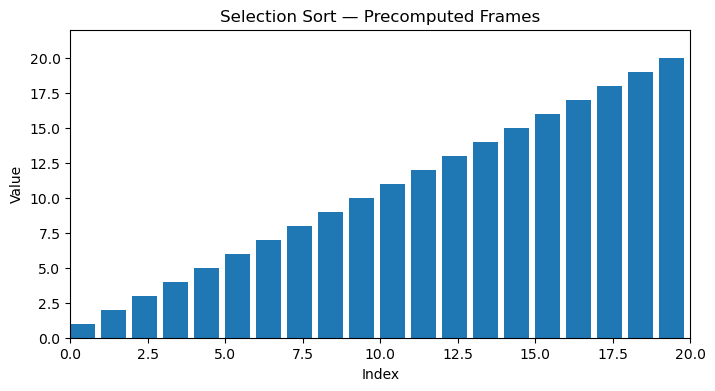

In [6]:
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def selection_sort_collect_frames(array):
    frames = [array[:]]  # include starting state if desired
    n = len(array)
    for i in range(n - 1):
        min_idx = i
        for j in range(i + 1, n):
            if array[j] < array[min_idx]:
                min_idx = j
        if min_idx != i:
            temp = array[i]
            array[i] = array[min_idx]
            frames.append(array[:])   # after first write
            array[min_idx] = temp
            frames.append(array[:])   # after second write
        else:
            frames.append(array[:])   # optional progress frame
    return frames

N = 20
random.seed(4)
data = list(range(1, N + 1))
random.shuffle(data)

frames_list = selection_sort_collect_frames(data[:])  # work on a copy

fig, ax = plt.subplots(figsize=(8, 4))
bars = ax.bar(range(len(frames_list[0])), frames_list[0], align='edge')
ax.set_xlim(0, len(frames_list[0]))
ax.set_ylim(0, max(frames_list[0]) * 1.1)
ax.set_title("Selection Sort — Precomputed Frames")
ax.set_xlabel("Index")
ax.set_ylabel("Value")

def update(frame):
    for rect, h in zip(bars, frame):
        rect.set_height(h)
    return bars

anim = FuncAnimation(fig, update, frames=frames_list, interval=200, blit=True, repeat=False)
HTML(anim.to_jshtml())


## 🔴 4) Practice — Your turn

- Change `N`, `interval`, or `seed` and re-run the animation cell(s).
- Adjust the code to do the sort in descending order!